# Machine Learning Pendeteksi *Fake Account* Instagram

Kebebasan berselancar di sosial media khususnya instagram di era sekarang sudah tidak bisa dibendung lagi. Setiap detiknya sangat banyak pertukaran informasi yang terjadi. Dari yang baik seperti pembelajaran atau keadaan suatu wilayah sampai yang buruk seperti hoax atau ujaran kebencian. Biasanya kredibilitas informasi terlihat dari akun yang menyampaikannya. Informasi yang buruk kebanyakan disebarkan melalui *fake account* dan hal ini mempermudah dalam mengidentifikasi kredibilitas informasi tersebut.
Namun, *fake account* sering sekali dibuat menyerupai sebagai akun asli dari seseorang alias bukan spam. Oleh karena itu, pemodelan machine learning ini diharapkan dapat membantu dalam mengidentifikasi sebuah akun apakah *fake* atau bukan.

- Jumlah data yang digunakan: 576 data
- Kelas data : Fake Account & Real Account 
- Sumber Data : https://www.kaggle.com/free4ever1/instagram-fake-spammer-genuine-accounts
- Tujuan : Menentukan apakah sebuah akun *fake* atau bukan

In [28]:
# import library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pickle

# Load Data, EDA, dan Data Cleansing

In [29]:
df=pd.read_csv('train.csv')
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


Tidak ada kolom yang kosong dan semuanya sudah sesuai formatnya masing-masing.

In [31]:
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [32]:
# Ganti isi kolom fake (label) dengan 'Fake Account' jika label = 1, dan 'Real Account' jika label = 0
df.fake = df.fake.map({ 0: 'Real Account',
                        1: 'Fake Account',})
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,Real Account
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,Real Account
2,1,0.10,2,0.0,0,0,0,1,13,159,98,Real Account
3,1,0.00,1,0.0,0,82,0,0,679,414,651,Real Account
4,1,0.00,2,0.0,0,0,0,1,6,151,126,Real Account


Text(0.5, 1.0, 'Grafik Jenis Akun')

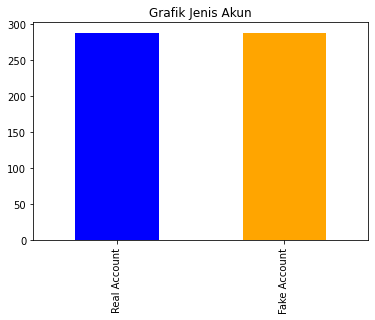

In [33]:
df.fake.value_counts().plot(kind='bar',color=['blue','orange'])

plt.title('Grafik Jenis Akun')

Terlihat jumlah data dengan label Real Account sama banyak dengan label Fake Account.

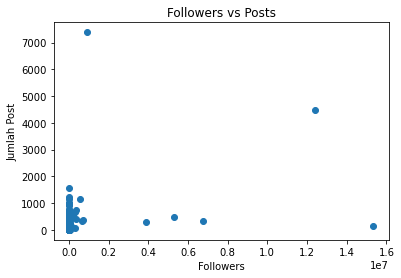

In [35]:
# Cek Korelasi
plt.scatter(x=df['#followers'], y=df['#posts']);

plt.title('Followers vs Posts');
plt.xlabel('Followers');
plt.ylabel('Jumlah Post');

Korelasi antara followers dengan jumlah postingan ternyata tidak memiliki korelasi yang kuat

# Modelling Machine Learning

In [36]:
# pisahkan fitur dan label
X=df.drop(['fake'], axis=1)
y=df['fake']

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 488 to 241
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           460 non-null    int64  
 1   nums/length username  460 non-null    float64
 2   fullname words        460 non-null    int64  
 3   nums/length fullname  460 non-null    float64
 4   name==username        460 non-null    int64  
 5   description length    460 non-null    int64  
 6   external URL          460 non-null    int64  
 7   private               460 non-null    int64  
 8   #posts                460 non-null    int64  
 9   #followers            460 non-null    int64  
 10  #follows              460 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 43.1 KB


Semua kolom adalah kolom numerik dan tidak ada kolom kategorik

### Membuat Pipeline

In [38]:
pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

data_preprocess = ColumnTransformer([
    ('preprocess', pipeline, list(X_train.columns)),
])

# Buat pipeline dengan berbagai model
ml_pipeline_LogReg = make_pipeline(data_preprocess, LogisticRegression())
ml_pipeline_KNN = make_pipeline(data_preprocess, KNeighborsClassifier())
ml_pipeline_SVM = make_pipeline(data_preprocess, LinearSVC())
ml_pipeline_DT = make_pipeline(data_preprocess, DecisionTreeClassifier())
ml_pipeline_RF = make_pipeline(data_preprocess, RandomForestClassifier())
ml_pipeline_NB = make_pipeline(data_preprocess, GaussianNB())

In [39]:
# train data dengan berbagai model
ml_pipeline_LogReg.fit(X_train, y_train)
ml_pipeline_KNN.fit(X_train, y_train)
ml_pipeline_SVM.fit(X_train, y_train)
ml_pipeline_DT.fit(X_train, y_train)
ml_pipeline_RF.fit(X_train, y_train)
ml_pipeline_NB.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['profile pic',
                                                   'nums/length username',
                                                   'fullname words',
                                                   'nums/length fullname',
                                                   'name==username',
                                                   'description length',
                                                   'external URL', 'private',
                                  

### Logistic Regression

In [40]:
y_pred_LogReg = ml_pipeline_LogReg.predict(X_test)
print(classification_report(y_test, y_pred_LogReg))

              precision    recall  f1-score   support

Fake Account       0.94      0.88      0.91        57
Real Account       0.89      0.95      0.92        59

    accuracy                           0.91       116
   macro avg       0.92      0.91      0.91       116
weighted avg       0.92      0.91      0.91       116



f1-score dengan model logistic regression sudah cukup tinggi namun masih bisa ditingkatkan lagi dibagian precision dan recall nya.

### K-Nearest Neighbors

In [41]:
y_pred_KNN = ml_pipeline_KNN.predict(X_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

Fake Account       0.96      0.91      0.94        57
Real Account       0.92      0.97      0.94        59

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.94      0.94      0.94       116



Secara keseluruhan model KNN lebih baik dari model sebelumnya.

### Support Vector Machine

In [42]:
y_pred_SVM = ml_pipeline_SVM.predict(X_test)
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

Fake Account       0.94      0.86      0.90        57
Real Account       0.88      0.95      0.91        59

    accuracy                           0.91       116
   macro avg       0.91      0.90      0.90       116
weighted avg       0.91      0.91      0.90       116



Sepertinya model SVM kurang cocok dengan kasus ini, walaupun memiliki score yang cukup tinggi tapi masih belum lebih baik dari model sebelumnya.

### Decision Tree

In [43]:
y_pred_DT = ml_pipeline_DT.predict(X_test)
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

Fake Account       0.89      0.88      0.88        57
Real Account       0.88      0.90      0.89        59

    accuracy                           0.89       116
   macro avg       0.89      0.89      0.89       116
weighted avg       0.89      0.89      0.89       116



Untuk model Decision Tree scorenya terbilang rendah karena tidak mencapai angka 90%

### Random Forest

In [44]:
y_pred_RF = ml_pipeline_RF.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

Fake Account       0.96      0.89      0.93        57
Real Account       0.90      0.97      0.93        59

    accuracy                           0.93       116
   macro avg       0.93      0.93      0.93       116
weighted avg       0.93      0.93      0.93       116



Model Random Forest memiliki score yang tinggi. Namun, masih belum lebih baik dari model KNN

### Naive Bayes

In [45]:
y_pred_NB = ml_pipeline_NB.predict(X_test)
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

Fake Account       0.63      0.96      0.76        57
Real Account       0.93      0.46      0.61        59

    accuracy                           0.71       116
   macro avg       0.78      0.71      0.69       116
weighted avg       0.78      0.71      0.69       116



Tidak seperti model yang lain, model Naive Bayes tidak memiliki score yang tinggi. Sepertinya untuk kasus ini model Naive Bayes tidak cocok untuk digunakan.

**Setelah semua proses percobaan setiap model, maka untuk kasus ini model KNN yang akan digunakan karena selain memiliki score tertinggi untuk waktu pemrosesannya juga tidak lama**

Sekarang, mari mencari tahu apakah model KNN ini masih bisa untuk lebih ditingkatkan lagi atau tidak dengan cara memodifikasi parameter `n_neighbors`

In [46]:
# membuat pipeline KNN yang baru
ml_pipeline_KNN_3 = make_pipeline(data_preprocess, KNeighborsClassifier(n_neighbors=3))
ml_pipeline_KNN_6 = make_pipeline(data_preprocess, KNeighborsClassifier(n_neighbors=6))
ml_pipeline_KNN_10 = make_pipeline(data_preprocess, KNeighborsClassifier(n_neighbors=10))

In [47]:
# training model
ml_pipeline_KNN_3.fit(X_train, y_train)
ml_pipeline_KNN_6.fit(X_train, y_train)
ml_pipeline_KNN_10.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['profile pic',
                                                   'nums/length username',
                                                   'fullname words',
                                                   'nums/length fullname',
                                                   'name==username',
                                                   'description length',
                                                   'external URL', 'private',
                                  

### Previous KNN Model

In [48]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

Fake Account       0.96      0.91      0.94        57
Real Account       0.92      0.97      0.94        59

    accuracy                           0.94       116
   macro avg       0.94      0.94      0.94       116
weighted avg       0.94      0.94      0.94       116



### KNN Model with `n_neighbors=3`

In [49]:
y_pred_KKN_3 = ml_pipeline_KNN_3.predict(X_test)
print(classification_report(y_test, y_pred_KKN_3))

              precision    recall  f1-score   support

Fake Account       0.94      0.89      0.92        57
Real Account       0.90      0.95      0.93        59

    accuracy                           0.92       116
   macro avg       0.92      0.92      0.92       116
weighted avg       0.92      0.92      0.92       116



### KNN Model with `n_neighbors=6`

In [50]:
y_pred_KKN_6 = ml_pipeline_KNN_6.predict(X_test)
print(classification_report(y_test, y_pred_KKN_6))

              precision    recall  f1-score   support

Fake Account       0.88      0.93      0.91        57
Real Account       0.93      0.88      0.90        59

    accuracy                           0.91       116
   macro avg       0.91      0.91      0.91       116
weighted avg       0.91      0.91      0.91       116



### KNN Model with `n_neighbors=10`

In [51]:
y_pred_KKN_10 = ml_pipeline_KNN_10.predict(X_test)
print(classification_report(y_test, y_pred_KKN_10))

              precision    recall  f1-score   support

Fake Account       0.96      0.89      0.93        57
Real Account       0.90      0.97      0.93        59

    accuracy                           0.93       116
   macro avg       0.93      0.93      0.93       116
weighted avg       0.93      0.93      0.93       116



# Conclusion

Setelah dilakukan beberapa percobaan memodifikasi parameter `n_neghbors` pada model KNN, ternyata tidak ada hasil yang lebih baik dari pemrosesan diawal. Oleh karena itu dapat disimpulkan bahwa pada kasus ini untuk model KNN yang optimal terdapat pada parameter default yaitu `n_neighbors=5`

# Save Model

In [52]:
# simpan pipeline
with open("insta_fake_model.pkl", "wb") as insta_fake_model:
    pickle.dump(ml_pipeline_KNN, insta_fake_model)